## packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime as dtz
import gsw
import matplotlib.dates as mdates
import matplotlib.ticker as tick
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## importar datos

In [2]:
prof1 = sio.loadmat("data/018517_20120217_1505_data.mat")
RBR = prof1["RBR"]
datetime = prof1['datetime']
datos = prof1['datos']
names = prof1['names']
units = prof1['units']

In [3]:
names2 = np.empty(9, dtype=object)
for i in range(0,9):
    names2[i] = names[i][0][0]

datetime2 = np.empty(len(datetime), dtype='U25')
for i in range(0,len(datetime)):
    datetime2[i] = datetime[i][0][0]


In [4]:
data = pd.DataFrame(datos, index=pd.to_datetime(datetime2, format='%Y-%m-%d %H:%M:%S'), columns=names2)
data

,Conductivity,Temperature,Pressure,Turbidity,Depth,Salinity,Specific Conductivity,Density Anomaly,Speed of sound
2012-02-16 06:30:01.000,-0.005841,16.008554,10.151100,161.168117,0.018449,0.000000,-7.051521,-1.056957,1469.595396
2012-02-16 06:30:01.167,-0.003883,16.009109,10.150142,161.111643,0.017499,0.000000,-4.688496,-1.057051,1469.597273
2012-02-16 06:30:01.334,-0.005303,16.009539,10.150271,161.088813,0.017627,0.000000,-6.401840,-1.057121,1469.598743
2012-02-16 06:30:01.501,-0.006137,16.009876,10.149626,161.076797,0.016987,0.000000,-7.409659,-1.057178,1469.599882
2012-02-16 06:30:01.667,-0.007167,16.010389,10.150161,161.047960,0.017517,0.000000,-8.652595,-1.057259,1469.601641
...,...,...,...,...,...,...,...,...,...
2012-02-16 15:59:48.500,0.005448,12.603267,10.279747,146.088420,0.146047,0.008388,7.138048,-0.564619,1457.466029
2012-02-16 15:59:48.667,0.002118,12.603412,10.278872,146.076404,0.145179,0.006964,2.775025,-0.565756,1457.464788
2012-02-16 15:59:48.833,0.003157,12.603334,10.278844,146.080009,0.145151,0.007371,4.136191,-0.565428,1457.465003
2012-02-16 15:59:49.000,-0.004588,12.603682,10.279978,146.070396,0.146275,0.000000,-6.011694,-0.571238,1457.457153


In [5]:
# lon = np.array([[-122.408351,
#                   -122.408351,
#                   -122.408392,
#                   -122,408409,
#                   -122,408414,
#                   -122.408350, 
#                   -122.408380,
#                   -122.407306, 
#                   -122.407306]])
points = np.array([[37.263298, -122.408351],
                  [37.263285, -122.408392],
                  [37.263284, -122.408409],
                  [37.263285, -122.408414],
                  [37.263312, -122.408350], 
                  [37.263308, -122.408380],
                  [37.263967, -122.407306], 
                  [37.263967, -122.407306],
                  [37.263362, -122.409570],
                  [37.263324, -122.409648],
                  [37.263855, -122.410244],
                  [37.263927, -122.410261], 
                  [37.263951, -122.410299],
                  [37.263970, -122.410316],
                  [37.263910, -122.410233],
                  [37.263938, -122.410275],
                  [37.263967, -122.410300], 
                  [37.264042, -122.410328], 
                  [37.264626, -122.410336], 
                  [37.264742, -122.410434],
                  [37.265546, -122.410892], 
                  [37.265557, -122.410907], 
                  [37.265549, -122.410926], 
                  [37.265589, -122.410924], 
                  [37.265629, -122.410901], 
                  [37.265719, -122.410819], 
                  [37.265727, -122.410812],
                  [37.265724, -122.410804]])



df = pd.DataFrame(points, columns=['Latitud', 'Longitud'])
df

,Latitud,Longitud
0,37.263298,-122.408351
1,37.263285,-122.408392
2,37.263284,-122.408409
3,37.263285,-122.408414
4,37.263312,-122.408350
5,37.263308,-122.408380
6,37.263967,-122.407306
7,37.263967,-122.407306
8,37.263362,-122.409570
9,37.263324,-122.409648


In [6]:
data.index = data.index + dtz.timedelta(hours=3) # OJO: correr una sola vez

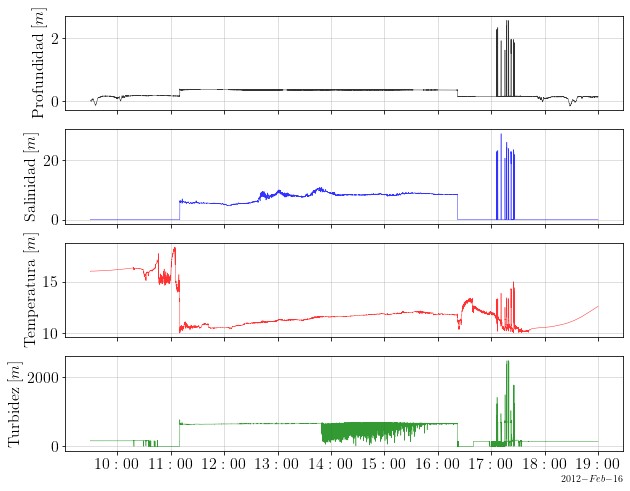

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data.index, data['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data.index, data['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data.index, data['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data.index, data['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

In [8]:
data_cut = data.loc[dtz.datetime(2012,2,16,8,10,0):dtz.datetime(2012,2,16,13,25,0)]

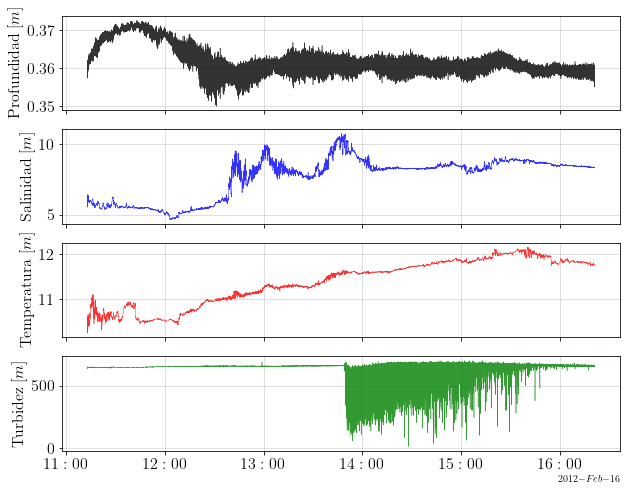

In [9]:
data_cut = data.iloc[37000:148000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

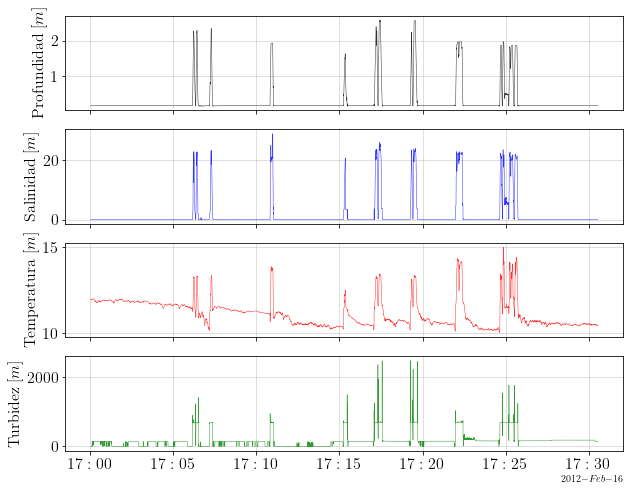

In [10]:
data_cut = data.iloc[162000:173000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

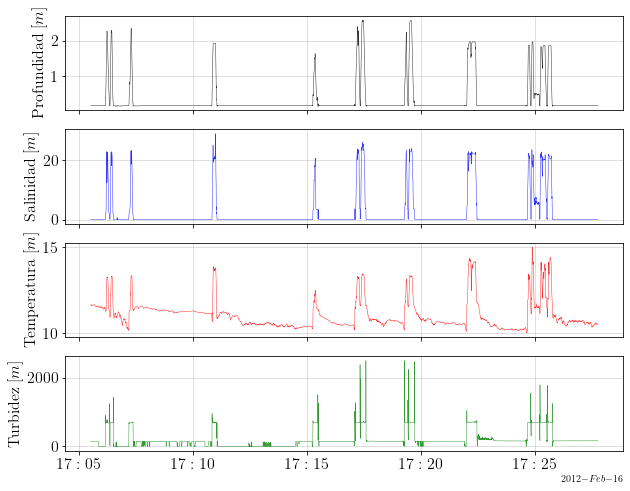

In [11]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,5,30):dtz.datetime(2012,2,16,17,27,45)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

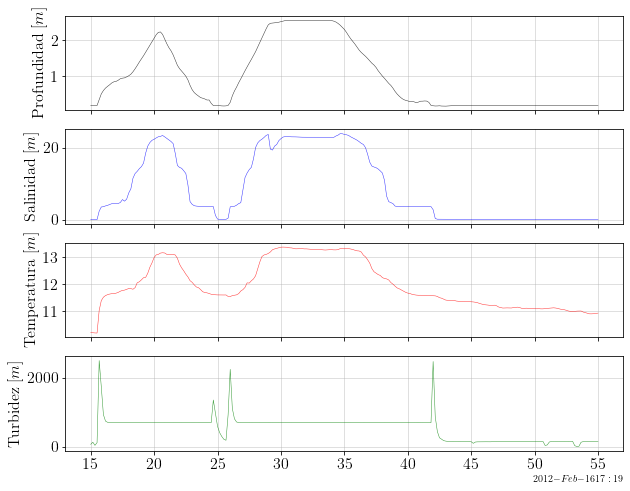

In [12]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,15):dtz.datetime(2012,2,16,17,19,55)]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(10, 8), sharex=True)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax1.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax1.plot(data_cut.index, data_cut['Depth'].values, c='k', alpha=0.8, linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=16)

ax2.plot(data_cut.index, data_cut['Salinity'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.grid(alpha=0.5)

ax3.set_ylabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3.plot(data_cut.index, data_cut['Temperature'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.grid(alpha=0.5)

ax4.set_ylabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=16)

ax4.plot(data_cut.index, data_cut['Turbidity'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

# Mapa

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [13]:
pes_m = plt.imread('data/map.png')
BBox = ((-122.41285,   -122.40585,      
         37.26246, 37.26748))

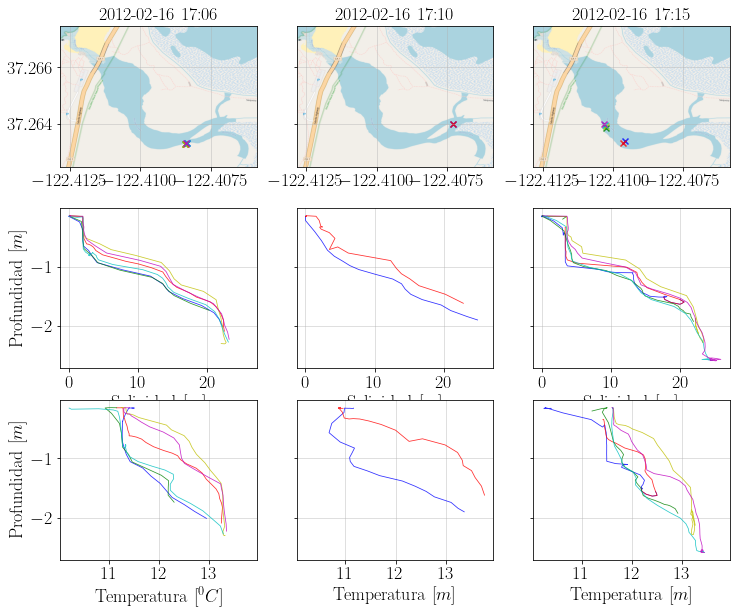

In [62]:
p1 = data.loc[dtz.datetime(2012,2,16,17,6,7):dtz.datetime(2012,2,16,17,6,12)]
p2 = data.loc[dtz.datetime(2012,2,16,17,6,14):dtz.datetime(2012,2,16,17,6,20)]
p3 = data.loc[dtz.datetime(2012,2,16,17,6,20):dtz.datetime(2012,2,16,17,6,23)]
p4 = data.loc[dtz.datetime(2012,2,16,17,6,25):dtz.datetime(2012,2,16,17,6,30)]
p5 = data.loc[dtz.datetime(2012,2,16,17,7,10):dtz.datetime(2012,2,16,17,7,16)]
p6 = data.loc[dtz.datetime(2012,2,16,17,7,17):dtz.datetime(2012,2,16,17,7,23)]

p7 = data.loc[dtz.datetime(2012,2,16,17,10,47):dtz.datetime(2012,2,16,17,10,52)]
p8 = data.loc[dtz.datetime(2012,2,16,17,10,59):dtz.datetime(2012,2,16,17,11,5)]

p9 = data.loc[dtz.datetime(2012,2,16,17,15,10):dtz.datetime(2012,2,16,17,15,21)]
p10 = data.loc[dtz.datetime(2012,2,16,17,15,20):dtz.datetime(2012,2,16,17,15,25)]
p11 = data.loc[dtz.datetime(2012,2,16,17,17,5):dtz.datetime(2012,2,16,17,17,11)]
p12 = data.loc[dtz.datetime(2012,2,16,17,17,13):dtz.datetime(2012,2,16,17,17,19)]
p13 = data.loc[dtz.datetime(2012,2,16,17,17,19):dtz.datetime(2012,2,16,17,17,25)]
p14 = data.loc[dtz.datetime(2012,2,16,17,17,25):dtz.datetime(2012,2,16,17,17,35)]
p15 = data.loc[dtz.datetime(2012,2,16,17,19,15):dtz.datetime(2012,2,16,17,19,20)]
p16 = data.loc[dtz.datetime(2012,2,16,17,19,20):dtz.datetime(2012,2,16,17,19,25)]
p17 = data.loc[dtz.datetime(2012,2,16,17,19,25):dtz.datetime(2012,2,16,17,19,29)]
p18 = data.loc[dtz.datetime(2012,2,16,17,19,31):dtz.datetime(2012,2,16,17,19,45)]




ig, ([[ax1, ax3, ax5], [ax2, ax4, ax6], [ax7, ax8, ax9]]) = plt.subplots(nrows=3, ncols=3, figsize = (12,10), sharey='row', sharex='row')
ax1.scatter(df.iloc[0].Longitud, df.iloc[0].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax1.scatter(df.iloc[1].Longitud, df.iloc[1].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')
ax1.scatter(df.iloc[2].Longitud, df.iloc[2].Latitud, zorder=1, alpha= 0.8, c='g', marker='x')
ax1.scatter(df.iloc[3].Longitud, df.iloc[3].Latitud, zorder=1, alpha= 0.8, c='y', marker='x')
ax1.scatter(df.iloc[4].Longitud, df.iloc[4].Latitud, zorder=1, alpha= 0.8, c='c', marker='x')
ax1.scatter(df.iloc[5].Longitud, df.iloc[5].Latitud, zorder=1, alpha= 0.8, c='m', marker='x')

ax1.set_title('2012-02-16 17:06',
          fontsize=18)
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.get_yaxis().get_major_formatter().set_useOffset(False)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=18)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax2.plot(p1['Salinity'].values, -p1['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax2.plot(p2['Salinity'].values, -p2['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax2.plot(p3['Salinity'].values, -p3['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax2.plot(p4['Salinity'].values, -p4['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax2.plot(p5['Salinity'].values, -p5['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax2.plot(p6['Salinity'].values, -p6['Depth'].values, c='m', alpha=0.8, linewidth=0.8)


ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.grid(alpha=0.5)

ax7.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=18)
ax7.set_xlabel(r"Temperatura "
          r"$\displaystyle[^0C]$",
          fontsize=18)

ax7.plot(p1['Temperature'].values, -p1['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax7.plot(p2['Temperature'].values, -p2['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax7.plot(p3['Temperature'].values, -p3['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax7.plot(p4['Temperature'].values, -p4['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax7.plot(p5['Temperature'].values, -p5['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax7.plot(p6['Temperature'].values, -p6['Depth'].values, c='m', alpha=0.8, linewidth=0.8)


ax7.xaxis.set_tick_params(labelsize=18)
ax7.yaxis.set_tick_params(labelsize=18)
ax7.grid(alpha=0.5)

ax3.scatter(df.iloc[6].Longitud, df.iloc[6].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax3.scatter(df.iloc[7].Longitud, df.iloc[7].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')

ax3.set_title('2012-02-16 17:10',
          fontsize=18)
ax3.set_xlim(BBox[0],BBox[1])
ax3.set_ylim(BBox[2],BBox[3])
ax3.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
ax3.get_yaxis().get_major_formatter().set_useOffset(False)

ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.grid(alpha=0.5)


ax4.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax4.plot(p7['Salinity'].values, -p7['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax4.plot(p8['Salinity'].values, -p8['Depth'].values, c='r', alpha=0.8, linewidth=0.8)


ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.grid(alpha=0.5)

ax8.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=18)

ax8.plot(p7['Temperature'].values, -p7['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax8.plot(p8['Temperature'].values, -p8['Depth'].values, c='r', alpha=0.8, linewidth=0.8)


ax8.xaxis.set_tick_params(labelsize=18)
ax8.yaxis.set_tick_params(labelsize=18)
ax8.grid(alpha=0.5)

ax5.scatter(df.iloc[8].Longitud, df.iloc[8].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax5.scatter(df.iloc[9].Longitud, df.iloc[9].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')
ax5.scatter(df.iloc[10].Longitud, df.iloc[10].Latitud, zorder=1, alpha= 0.8, c='g', marker='x')
ax5.scatter(df.iloc[11].Longitud, df.iloc[11].Latitud, zorder=1, alpha= 0.8, c='y', marker='x')
ax5.scatter(df.iloc[12].Longitud, df.iloc[12].Latitud, zorder=1, alpha= 0.8, c='c', marker='x')
ax5.scatter(df.iloc[13].Longitud, df.iloc[13].Latitud, zorder=1, alpha= 0.8, c='m', marker='x')

ax5.set_title('2012-02-16 17:15',
          fontsize=18)
ax5.set_xlim(BBox[0],BBox[1])
ax5.set_ylim(BBox[2],BBox[3])
ax5.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax5.get_xaxis().get_major_formatter().set_useOffset(False)
ax5.get_yaxis().get_major_formatter().set_useOffset(False)

ax5.xaxis.set_tick_params(labelsize=18)
ax5.yaxis.set_tick_params(labelsize=18)
ax5.grid(alpha=0.5)


ax6.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax6.plot(p9['Salinity'].values, -p9['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax6.plot(p10['Salinity'].values, -p10['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax6.plot(p11['Salinity'].values, -p11['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax6.plot(p12['Salinity'].values, -p12['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax6.plot(p13['Salinity'].values, -p13['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax6.plot(p14['Salinity'].values, -p14['Depth'].values, c='m', alpha=0.8, linewidth=0.8)

ax6.xaxis.set_tick_params(labelsize=18)
ax6.yaxis.set_tick_params(labelsize=18)
ax6.grid(alpha=0.5)

ax9.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=18)

ax9.plot(p9['Temperature'].values, -p9['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax9.plot(p10['Temperature'].values, -p10['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax9.plot(p11['Temperature'].values, -p11['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax9.plot(p12['Temperature'].values, -p12['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax9.plot(p13['Temperature'].values, -p13['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax9.plot(p14['Temperature'].values, -p14['Depth'].values, c='m', alpha=0.8, linewidth=0.8)

ax9.xaxis.set_tick_params(labelsize=18)
ax9.yaxis.set_tick_params(labelsize=18)
ax9.grid(alpha=0.5)

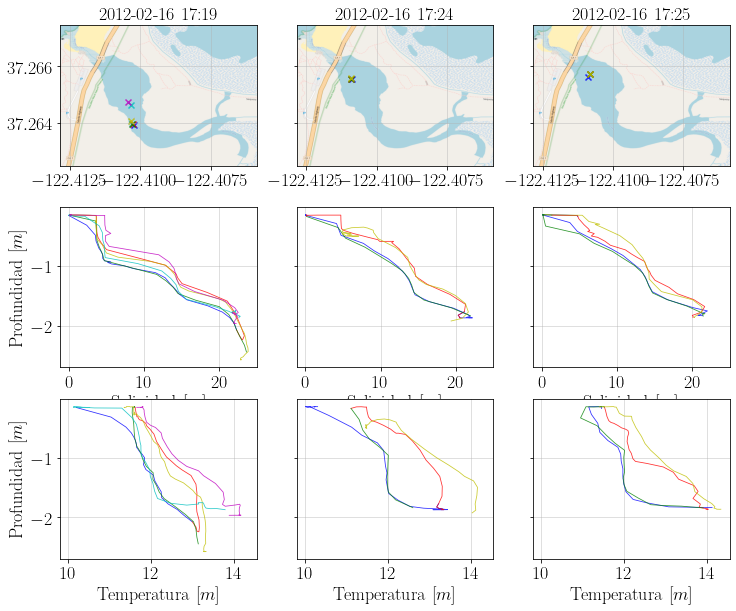

In [63]:
p15 = data.loc[dtz.datetime(2012,2,16,17,19,15):dtz.datetime(2012,2,16,17,19,20)]
p16 = data.loc[dtz.datetime(2012,2,16,17,19,20):dtz.datetime(2012,2,16,17,19,25)]
p17 = data.loc[dtz.datetime(2012,2,16,17,19,25):dtz.datetime(2012,2,16,17,19,29)]
p18 = data.loc[dtz.datetime(2012,2,16,17,19,31):dtz.datetime(2012,2,16,17,19,45)]
p19 = data.loc[dtz.datetime(2012,2,16,17,21,55):dtz.datetime(2012,2,16,17,22,4)]
p20 = data.loc[dtz.datetime(2012,2,16,17,22,15):dtz.datetime(2012,2,16,17,22,30)]

p21 = data.loc[dtz.datetime(2012,2,16,17,24,35):dtz.datetime(2012,2,16,17,24,45)]
p22 = data.loc[dtz.datetime(2012,2,16,17,24,44):dtz.datetime(2012,2,16,17,24,49)]
p23 = data.loc[dtz.datetime(2012,2,16,17,24,49):dtz.datetime(2012,2,16,17,24,51)]
p24 = data.loc[dtz.datetime(2012,2,16,17,24,54):dtz.datetime(2012,2,16,17,25,0)]

p25 = data.loc[dtz.datetime(2012,2,16,17,25,11):dtz.datetime(2012,2,16,17,25,15)]
p26 = data.loc[dtz.datetime(2012,2,16,17,25,25):dtz.datetime(2012,2,16,17,25,30)]
p27 = data.loc[dtz.datetime(2012,2,16,17,25,30):dtz.datetime(2012,2,16,17,25,35)]
p28 = data.loc[dtz.datetime(2012,2,16,17,25,40):dtz.datetime(2012,2,16,17,25,45)]



ig, ([[ax1, ax3, ax5], [ax2, ax4, ax6], [ax7, ax8, ax9]]) = plt.subplots(nrows=3, ncols=3, figsize = (12,10), sharey='row', sharex='row')

ax1.scatter(df.iloc[14].Longitud, df.iloc[14].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax1.scatter(df.iloc[15].Longitud, df.iloc[15].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')
ax1.scatter(df.iloc[16].Longitud, df.iloc[16].Latitud, zorder=1, alpha= 0.8, c='g', marker='x')
ax1.scatter(df.iloc[17].Longitud, df.iloc[17].Latitud, zorder=1, alpha= 0.8, c='y', marker='x')
ax1.scatter(df.iloc[18].Longitud, df.iloc[18].Latitud, zorder=1, alpha= 0.8, c='c', marker='x')
ax1.scatter(df.iloc[19].Longitud, df.iloc[19].Latitud, zorder=1, alpha= 0.8, c='m', marker='x')

ax1.set_title('2012-02-16 17:19',
          fontsize=18)
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax1.get_yaxis().get_major_formatter().set_useOffset(False)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.grid(alpha=0.5)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=18)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax2.plot(p15['Salinity'].values, -p15['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax2.plot(p16['Salinity'].values, -p16['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax2.plot(p17['Salinity'].values, -p17['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax2.plot(p18['Salinity'].values, -p18['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax2.plot(p19['Salinity'].values, -p19['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax2.plot(p20['Salinity'].values, -p20['Depth'].values, c='m', alpha=0.8, linewidth=0.8)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.grid(alpha=0.5)

ax7.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=18)
ax7.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=18)

ax7.plot(p15['Temperature'].values, -p15['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax7.plot(p16['Temperature'].values, -p16['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax7.plot(p17['Temperature'].values, -p17['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax7.plot(p18['Temperature'].values, -p18['Depth'].values, c='y', alpha=0.8, linewidth=0.8)
ax7.plot(p19['Temperature'].values, -p19['Depth'].values, c='c', alpha=0.8, linewidth=0.8)
ax7.plot(p20['Temperature'].values, -p20['Depth'].values, c='m', alpha=0.8, linewidth=0.8)

ax7.xaxis.set_tick_params(labelsize=18)
ax7.yaxis.set_tick_params(labelsize=18)
ax7.grid(alpha=0.5)

ax3.scatter(df.iloc[20].Longitud, df.iloc[20].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax3.scatter(df.iloc[21].Longitud, df.iloc[21].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')
ax3.scatter(df.iloc[22].Longitud, df.iloc[22].Latitud, zorder=1, alpha= 0.8, c='g', marker='x')
ax3.scatter(df.iloc[23].Longitud, df.iloc[23].Latitud, zorder=1, alpha= 0.8, c='y', marker='x')

ax3.set_title('2012-02-16 17:24',
          fontsize=18)
ax3.set_xlim(BBox[0],BBox[1])
ax3.set_ylim(BBox[2],BBox[3])
ax3.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
ax3.get_yaxis().get_major_formatter().set_useOffset(False)

ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.grid(alpha=0.5)


ax4.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax4.plot(p21['Salinity'].values, -p21['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax4.plot(p22['Salinity'].values, -p22['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax4.plot(p23['Salinity'].values, -p23['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax4.plot(p24['Salinity'].values, -p24['Depth'].values, c='y', alpha=0.8, linewidth=0.8)


ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.grid(alpha=0.5)

ax8.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=18)

ax8.plot(p21['Temperature'].values, -p21['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax8.plot(p22['Temperature'].values, -p22['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax8.plot(p23['Temperature'].values, -p23['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax8.plot(p24['Temperature'].values, -p24['Depth'].values, c='y', alpha=0.8, linewidth=0.8)


ax8.xaxis.set_tick_params(labelsize=18)
ax8.yaxis.set_tick_params(labelsize=18)
ax8.grid(alpha=0.5)


ax5.scatter(df.iloc[24].Longitud, df.iloc[24].Latitud, zorder=1, alpha= 0.8, c='b', marker='x')
ax5.scatter(df.iloc[25].Longitud, df.iloc[25].Latitud, zorder=1, alpha= 0.8, c='r', marker='x')
ax5.scatter(df.iloc[26].Longitud, df.iloc[26].Latitud, zorder=1, alpha= 0.8, c='g', marker='x')
ax5.scatter(df.iloc[27].Longitud, df.iloc[27].Latitud, zorder=1, alpha= 0.8, c='y', marker='x')

ax5.set_title('2012-02-16 17:25',
          fontsize=18)
ax5.set_xlim(BBox[0],BBox[1])
ax5.set_ylim(BBox[2],BBox[3])
ax5.imshow(pes_m, zorder=0, extent = BBox, aspect= 'equal')
ax5.get_xaxis().get_major_formatter().set_useOffset(False)
ax5.get_yaxis().get_major_formatter().set_useOffset(False)

ax5.xaxis.set_tick_params(labelsize=18)
ax5.yaxis.set_tick_params(labelsize=18)
ax5.grid(alpha=0.5)


ax6.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=18)

ax6.plot(p25['Salinity'].values, -p25['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax6.plot(p26['Salinity'].values, -p26['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax6.plot(p27['Salinity'].values, -p27['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax6.plot(p28['Salinity'].values, -p28['Depth'].values, c='y', alpha=0.8, linewidth=0.8)

ax6.xaxis.set_tick_params(labelsize=18)
ax6.yaxis.set_tick_params(labelsize=18)
ax6.grid(alpha=0.5)

ax9.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=18)

ax9.plot(p25['Temperature'].values, -p25['Depth'].values, c='b', alpha=0.8, linewidth=0.8)
ax9.plot(p26['Temperature'].values, -p26['Depth'].values, c='r', alpha=0.8, linewidth=0.8)
ax9.plot(p27['Temperature'].values, -p27['Depth'].values, c='g', alpha=0.8, linewidth=0.8)
ax9.plot(p28['Temperature'].values, -p28['Depth'].values, c='y', alpha=0.8, linewidth=0.8)

ax9.xaxis.set_tick_params(labelsize=18)
ax9.yaxis.set_tick_params(labelsize=18)
ax9.grid(alpha=0.5)

## Perfiles

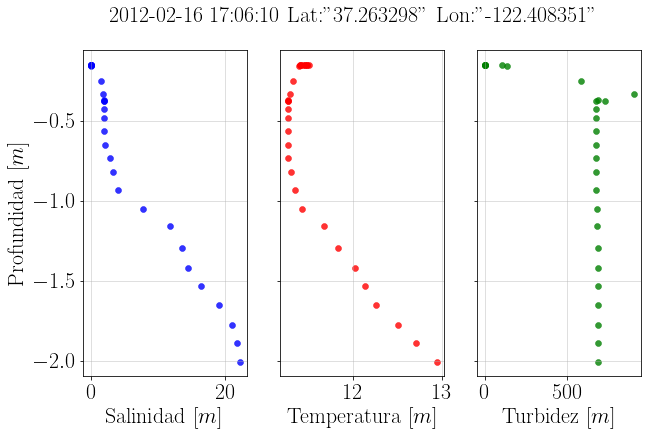

In [15]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,7):dtz.datetime(2012,2,16,17,6,12)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:10 Lat:"37.263298" Lon:"-122.408351"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

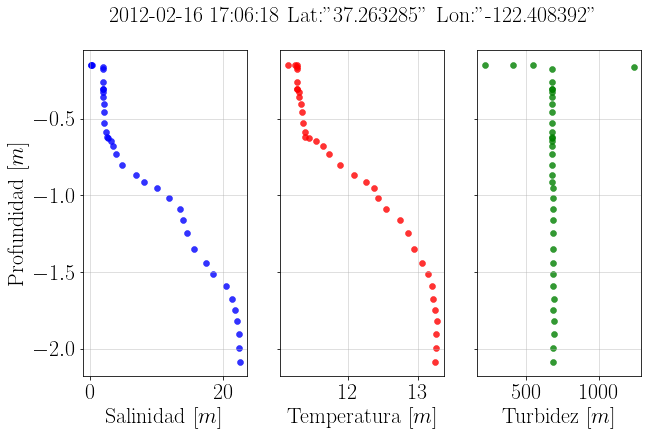

In [16]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,14):dtz.datetime(2012,2,16,17,6,20)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:18 Lat:"37.263285" Lon:"-122.408392"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

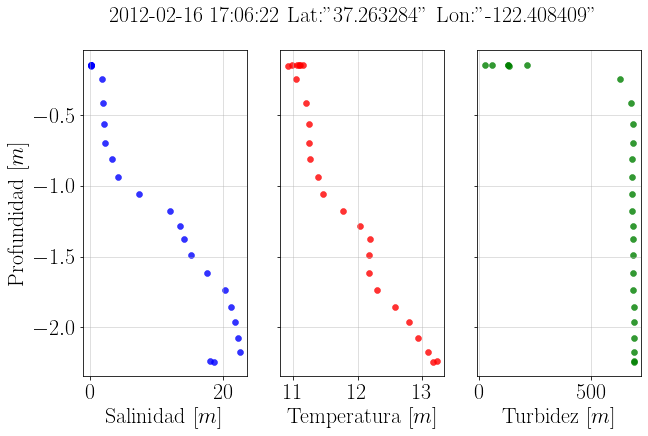

In [17]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,20):dtz.datetime(2012,2,16,17,6,24)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:22 Lat:"37.263284" Lon:"-122.408409"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

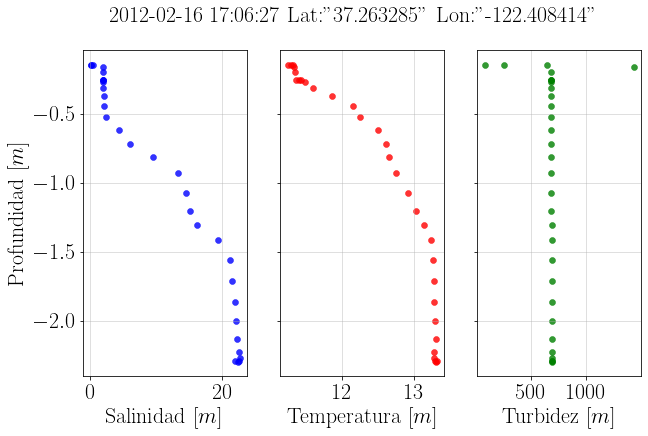

In [18]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,6,25):dtz.datetime(2012,2,16,17,6,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:06:27 Lat:"37.263285" Lon:"-122.408414"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

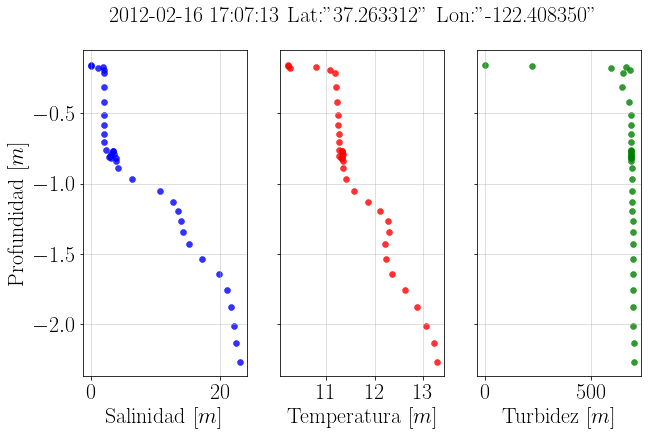

In [19]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,7,10):dtz.datetime(2012,2,16,17,7,16)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:07:13 Lat:"37.263312" Lon:"-122.408350"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

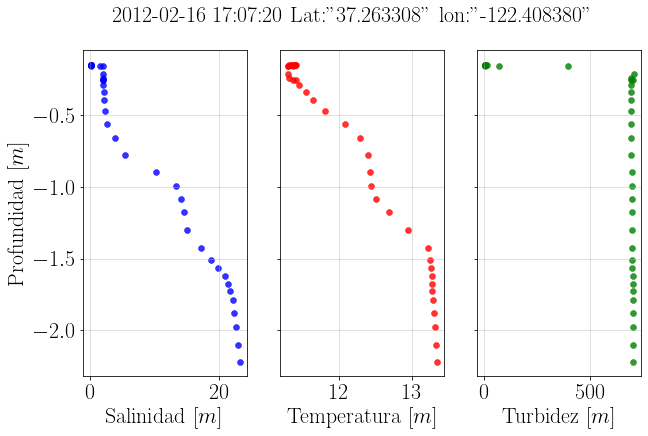

In [20]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,7,17):dtz.datetime(2012,2,16,17,7,23)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:07:20 Lat:"37.263308" lon:"-122.408380"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

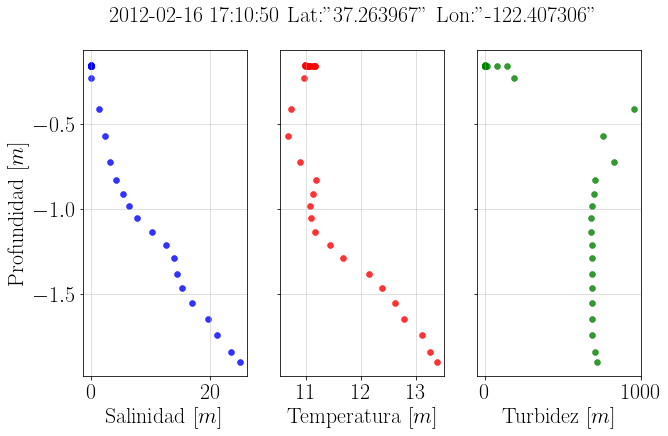

In [21]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,10,47):dtz.datetime(2012,2,16,17,10,52)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:10:50 Lat:"37.263967" Lon:"-122.407306"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

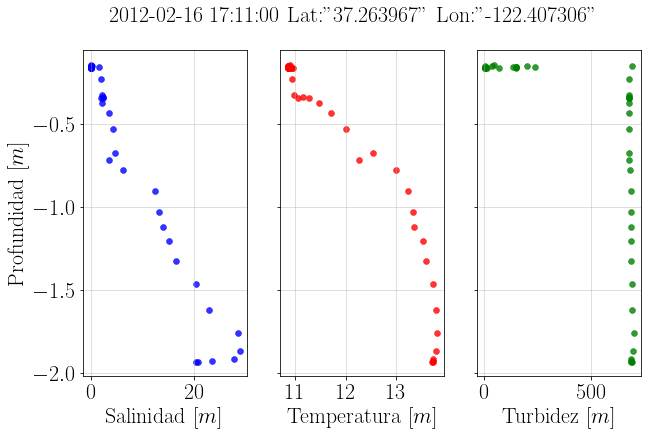

In [22]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,10,58):dtz.datetime(2012,2,16,17,11,5)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:11:00 Lat:"37.263967" Lon:"-122.407306"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

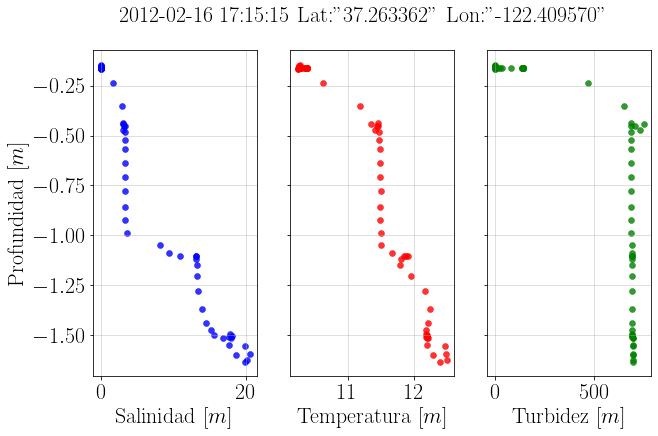

In [23]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,15,10):dtz.datetime(2012,2,16,17,15,21)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:15:15 Lat:"37.263362" Lon:"-122.409570"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

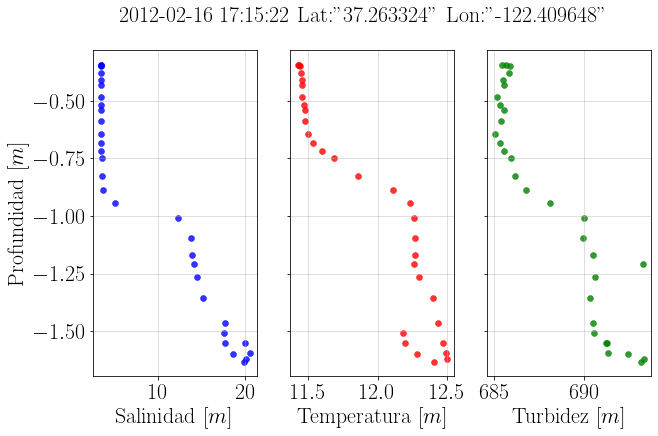

In [24]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,15,20):dtz.datetime(2012,2,16,17,15,25)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:15:22 Lat:"37.263324" Lon:"-122.409648"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

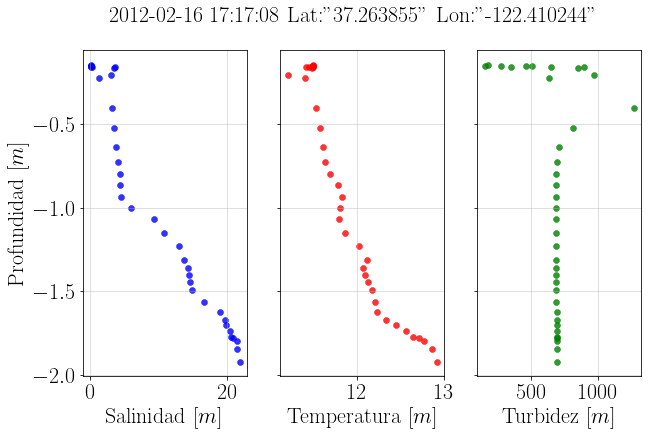

In [25]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,5):dtz.datetime(2012,2,16,17,17,11)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:08 Lat:"37.263855" Lon:"-122.410244"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

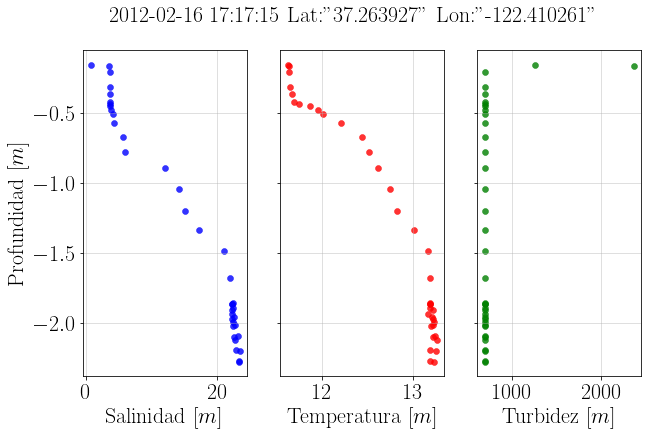

In [26]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,13):dtz.datetime(2012,2,16,17,17,19)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:15 Lat:"37.263927" Lon:"-122.410261"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

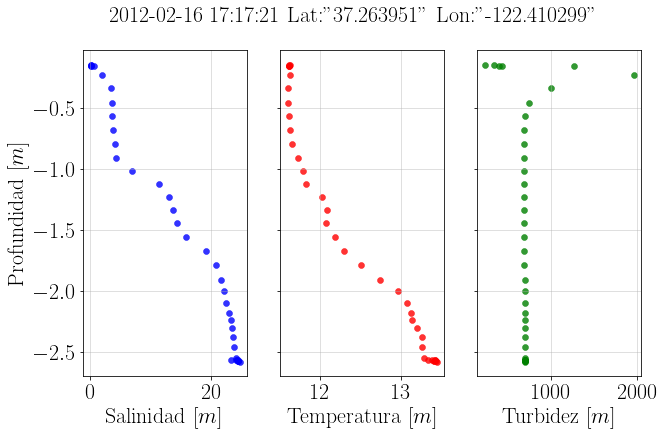

In [27]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,19):dtz.datetime(2012,2,16,17,17,25)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:21 Lat:"37.263951" Lon:"-122.410299"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

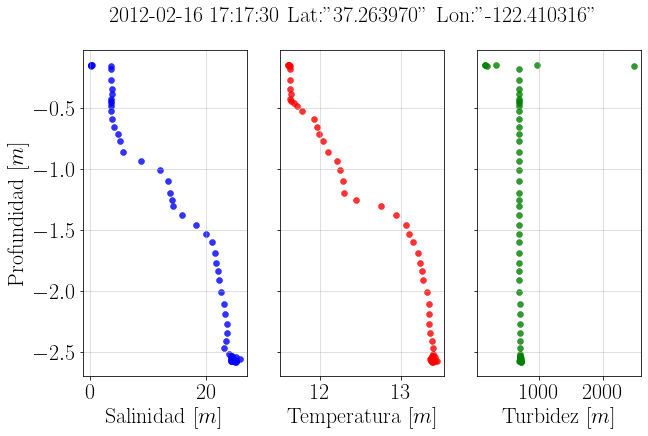

In [28]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,17,25):dtz.datetime(2012,2,16,17,17,35)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:17:30 Lat:"37.263970" Lon:"-122.410316"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

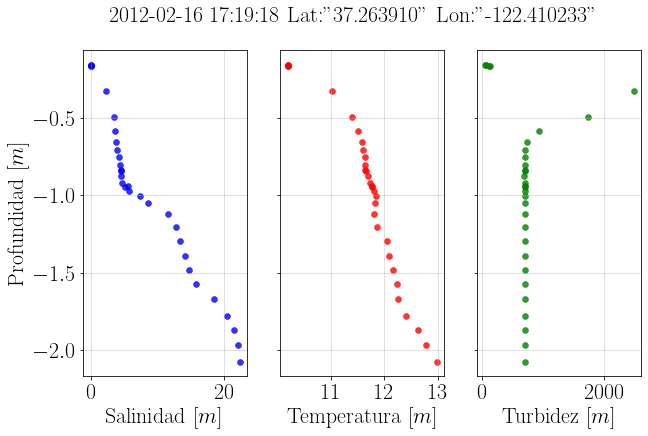

In [29]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,15):dtz.datetime(2012,2,16,17,19,20)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:18 Lat:"37.263910" Lon:"-122.410233"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

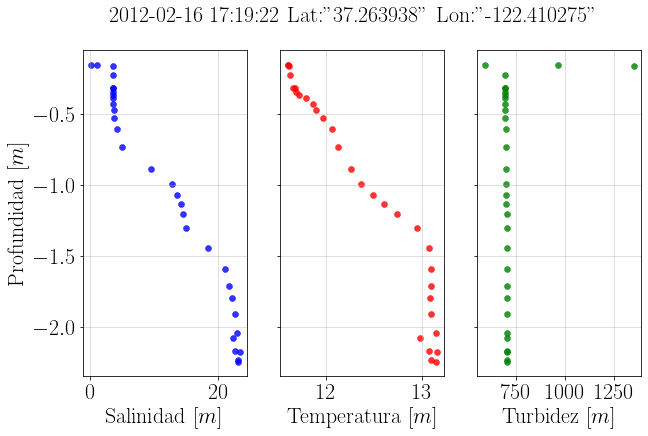

In [30]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,20):dtz.datetime(2012,2,16,17,19,25)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:22 Lat:"37.263938" Lon:"-122.410275"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

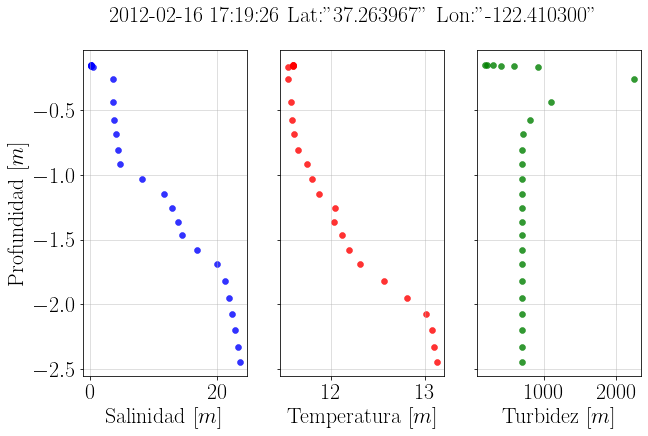

In [31]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,25):dtz.datetime(2012,2,16,17,19,29)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:26 Lat:"37.263967" Lon:"-122.410300"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

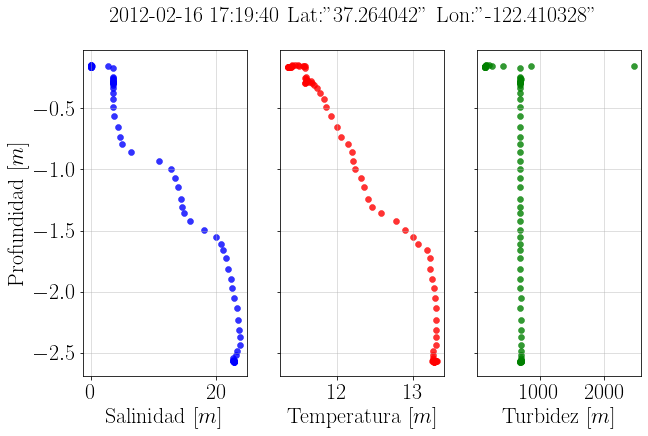

In [32]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,19,31):dtz.datetime(2012,2,16,17,19,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:19:40 Lat:"37.264042" Lon:"-122.410328"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

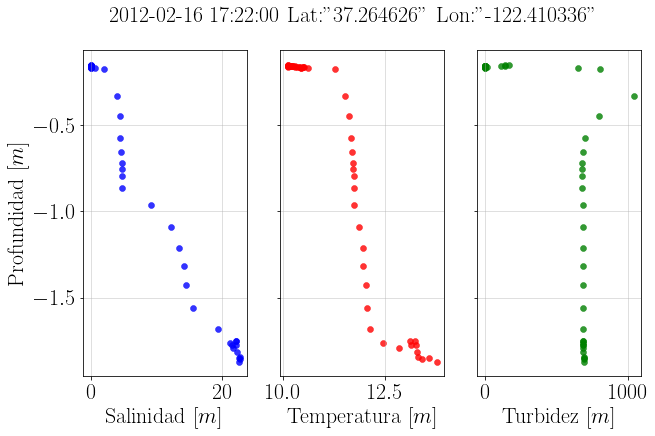

In [33]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,21,55):dtz.datetime(2012,2,16,17,22,4)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:22:00 Lat:"37.264626" Lon:"-122.410336"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

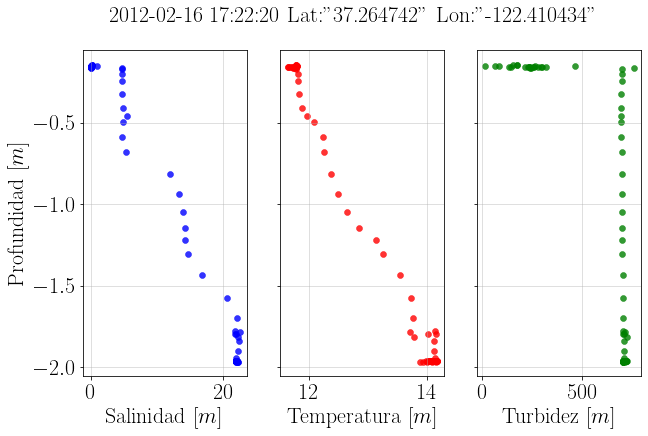

In [34]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,22,15):dtz.datetime(2012,2,16,17,22,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:22:20 Lat:"37.264742" Lon:"-122.410434"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

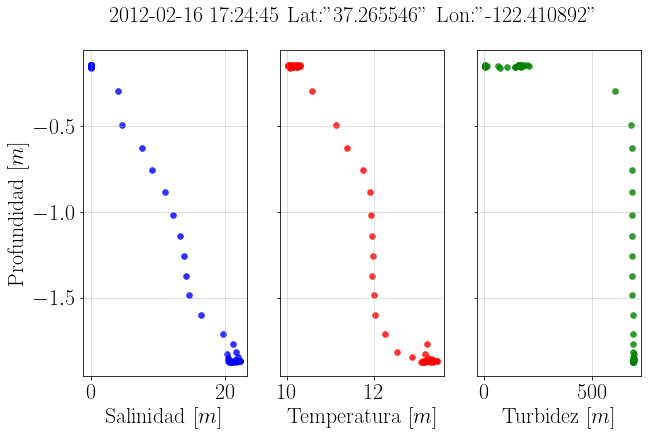

In [35]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,35):dtz.datetime(2012,2,16,17,24,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:45 Lat:"37.265546" Lon:"-122.410892"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

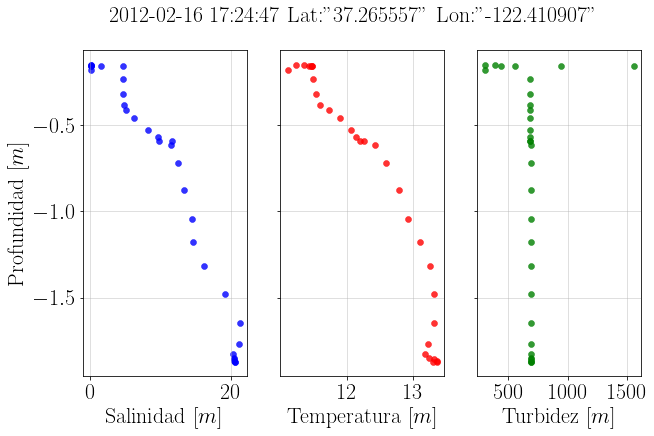

In [36]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,44):dtz.datetime(2012,2,16,17,24,49)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:47 Lat:"37.265557" Lon:"-122.410907"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

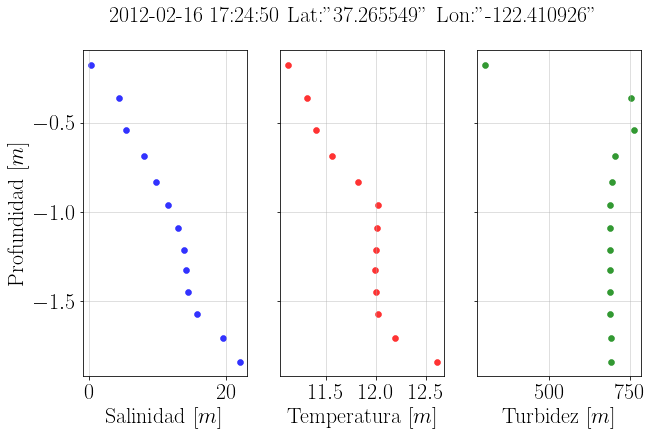

In [37]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,49):dtz.datetime(2012,2,16,17,24,51)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:50 Lat:"37.265549" Lon:"-122.410926"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

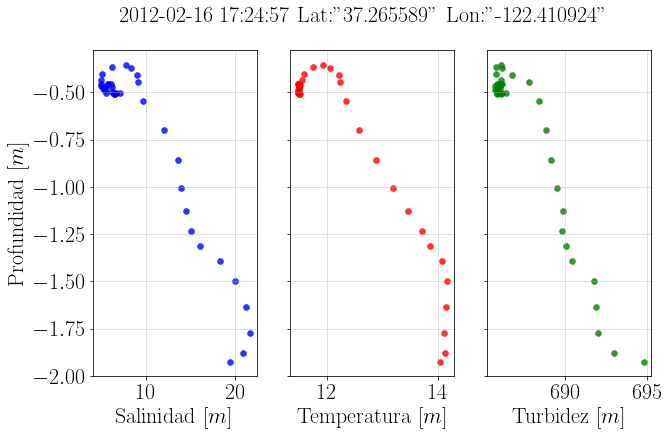

In [38]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,24,54):dtz.datetime(2012,2,16,17,25,0)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:24:57 Lat:"37.265589" Lon:"-122.410924"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

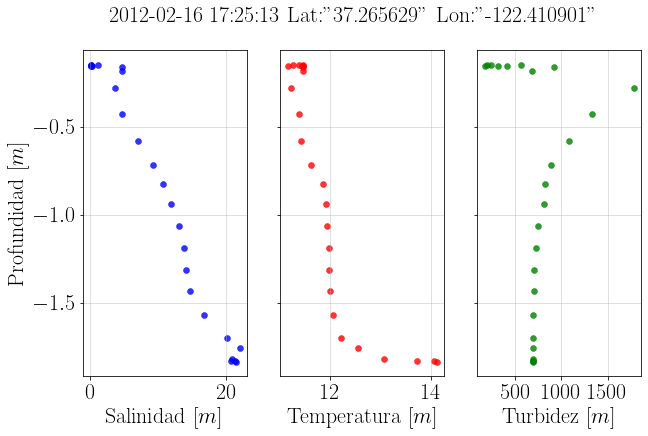

In [39]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,11):dtz.datetime(2012,2,16,17,25,15)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:13 Lat:"37.265629" Lon:"-122.410901"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

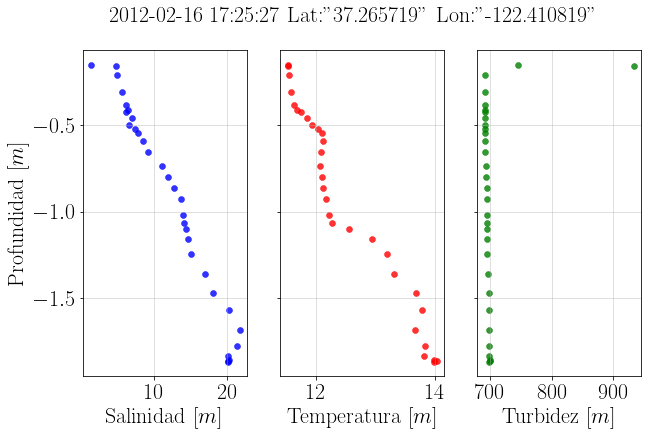

In [40]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,25):dtz.datetime(2012,2,16,17,25,30)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:27 Lat:"37.265719" Lon:"-122.410819"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

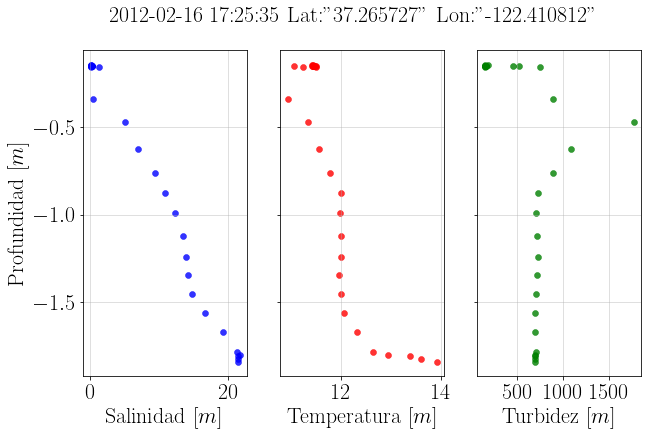

In [41]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,30):dtz.datetime(2012,2,16,17,25,35)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:35 Lat:"37.265727" Lon:"-122.410812"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

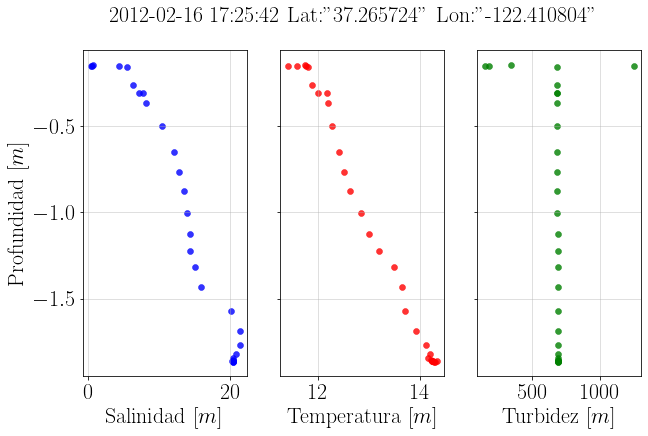

In [42]:
data_cut = data.loc[dtz.datetime(2012,2,16,17,25,40):dtz.datetime(2012,2,16,17,25,45)]
fig, (ax2, ax3, ax4) = plt.subplots(ncols=3, figsize=(10, 6), sharey=True)

fig.suptitle('2012-02-16 17:25:42 Lat:"37.265724" Lon:"-122.410804"', fontsize=22)
#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax2.set_ylabel(r"Profundidad "
          r"$\displaystyle[m]$",
          fontsize=22)
ax2.set_xlabel(r"Salinidad "
          r"$\displaystyle[m]$",
          fontsize=22)

ax2.scatter(data_cut['Salinity'].values, -data_cut['Depth'].values, c='b', alpha=0.8, linewidth=0.5)
ax2.xaxis.set_tick_params(labelsize=22)
ax2.yaxis.set_tick_params(labelsize=22)
ax2.grid(alpha=0.5)

ax3.set_xlabel(r"Temperatura "
          r"$\displaystyle[m]$",
          fontsize=22)

ax3.scatter(data_cut['Temperature'].values, -data_cut['Depth'].values, c='r', alpha=0.8, linewidth=0.5)
ax3.xaxis.set_tick_params(labelsize=22)
ax3.yaxis.set_tick_params(labelsize=22)
ax3.grid(alpha=0.5)

ax4.set_xlabel(r"Turbidez "
          r"$\displaystyle[m]$",
          fontsize=22)

ax4.scatter(data_cut['Turbidity'].values, -data_cut['Depth'].values, c='g', alpha=0.8, linewidth=0.5)
ax4.xaxis.set_tick_params(labelsize=22)
ax4.yaxis.set_tick_params(labelsize=22)
ax4.grid(alpha=0.5)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)